<a href="https://colab.research.google.com/github/leovcunha/kaggle-solutions/blob/master/digit-recognizer/cnn-mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from __future__ import absolute_import, division, print_function, unicode_literals

In [0]:
!pip install -q tensorflow==2.0.0-alpha0

     |████████████████████████████████| 79.9MB 366kB/s 
     |████████████████████████████████| 3.0MB 37.3MB/s 
     |████████████████████████████████| 419kB 48.4MB/s 
     |████████████████████████████████| 61kB 23.5MB/s 


In [0]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [0]:
digits = pd.read_csv("https://raw.githubusercontent.com/leovcunha/kaggle-solutions/master/digit-recognizer/data/train.csv")
x_test

In [0]:
y_train = digits['label']
print(y_train.head(10))

0    1
1    0
2    1
3    4
4    0
5    0
6    7
7    3
8    5
9    3
Name: label, dtype: int64


In [0]:
x_train = digits.drop('label', axis=1)
x_test = pd.read_csv("https://raw.githubusercontent.com/leovcunha/kaggle-solutions/master/digit-recognizer/data/test.csv")

In [0]:
x_train = x_train.values/255
x_test = x_test.values/255

In [0]:
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_train.reshape((-1, 28, 28, 1))

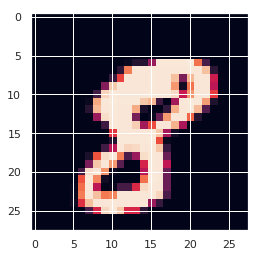

In [0]:
plt.imshow(x_train[10][:,:,0])

In [0]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 10)

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [0]:
y_train.shape

(42000, 10)

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=30)

Epoch 1/30
42000/42000 [==============================] - 40s 959us/sample - loss: 0.1663 - accuracy: 0.9472
Epoch 2/30
42000/42000 [==============================] - 40s 955us/sample - loss: 0.0528 - accuracy: 0.9841
Epoch 3/30
42000/42000 [==============================] - 40s 962us/sample - loss: 0.0369 - accuracy: 0.9881
Epoch 4/30
42000/42000 [==============================] - 40s 944us/sample - loss: 0.0287 - accuracy: 0.9908
Epoch 5/30
42000/42000 [==============================] - 40s 943us/sample - loss: 0.0230 - accuracy: 0.9925
Epoch 6/30
42000/42000 [==============================] - 39s 939us/sample - loss: 0.0196 - accuracy: 0.9938
Epoch 7/30
42000/42000 [==============================] - 39s 939us/sample - loss: 0.0160 - accuracy: 0.9950
Epoch 8/30
42000/42000 [==============================] - 40s 941us/sample - loss: 0.0133 - accuracy: 0.9957
Epoch 9/30
42000/42000 [==============================] - 39s 936us/sample - loss: 0.0123 - accuracy: 0.9960
Epoch 10/30
42000/4

In [0]:
results = model.predict(x_test)

In [0]:
results = np.argmax(results,axis = 1)

In [0]:
results = pd.Series(results,name="Label")


In [0]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("submission.csv",index=False)

In [0]:
!pip install pydrive

     |████████████████████████████████| 993kB 2.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built pydrive
